# Data Glacier Internship

Deliverable - Week 12

Decision Tree Algorithm

Nahari Terena - LISUM15

## Problem Statement

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', None)

### Import dataset

In [2]:
data = pd.read_csv('Healthcare_clean.csv', sep = ";")
df = data.drop(['Ptid'], axis=1)
df.tail()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,1,0,0,0,0,0,0,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,0,...,0,0,1,0,0,0,0,0,0,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,...,0,0,1,0,0,0,0,0,0,1


In [3]:
df.shape

(3424, 64)

In [4]:
## Confusion Matrix

def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [5]:
## Metrics

def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metrics')
    plt.show()

In [6]:
df.select_dtypes(include=object).columns

Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Adherent_Flag'],
      dtype='object')

In [7]:
le = LabelEncoder()

df['Persistency_Flag'] = le.fit_transform(df['Persistency_Flag'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Race'] = le.fit_transform(df['Race'])
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])
df['Region'] = le.fit_transform(df['Region'])
df['Ntm_Speciality'] = le.fit_transform(df['Ntm_Speciality'])
df['Ntm_Specialist_Flag'] = le.fit_transform(df['Ntm_Specialist_Flag'])
df['Ntm_Speciality_Bucket'] = le.fit_transform(df['Ntm_Speciality_Bucket'])
df['Adherent_Flag'] = le.fit_transform(df['Adherent_Flag'])

## transforming the Age_Bucket variable to numeric. 
df.replace(to_replace={
        ">75": 0,
        "65-75": 1,
        "55-65": 2,
        "<55": 3
    },
        inplace=True)

df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,1,2,1,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,4,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


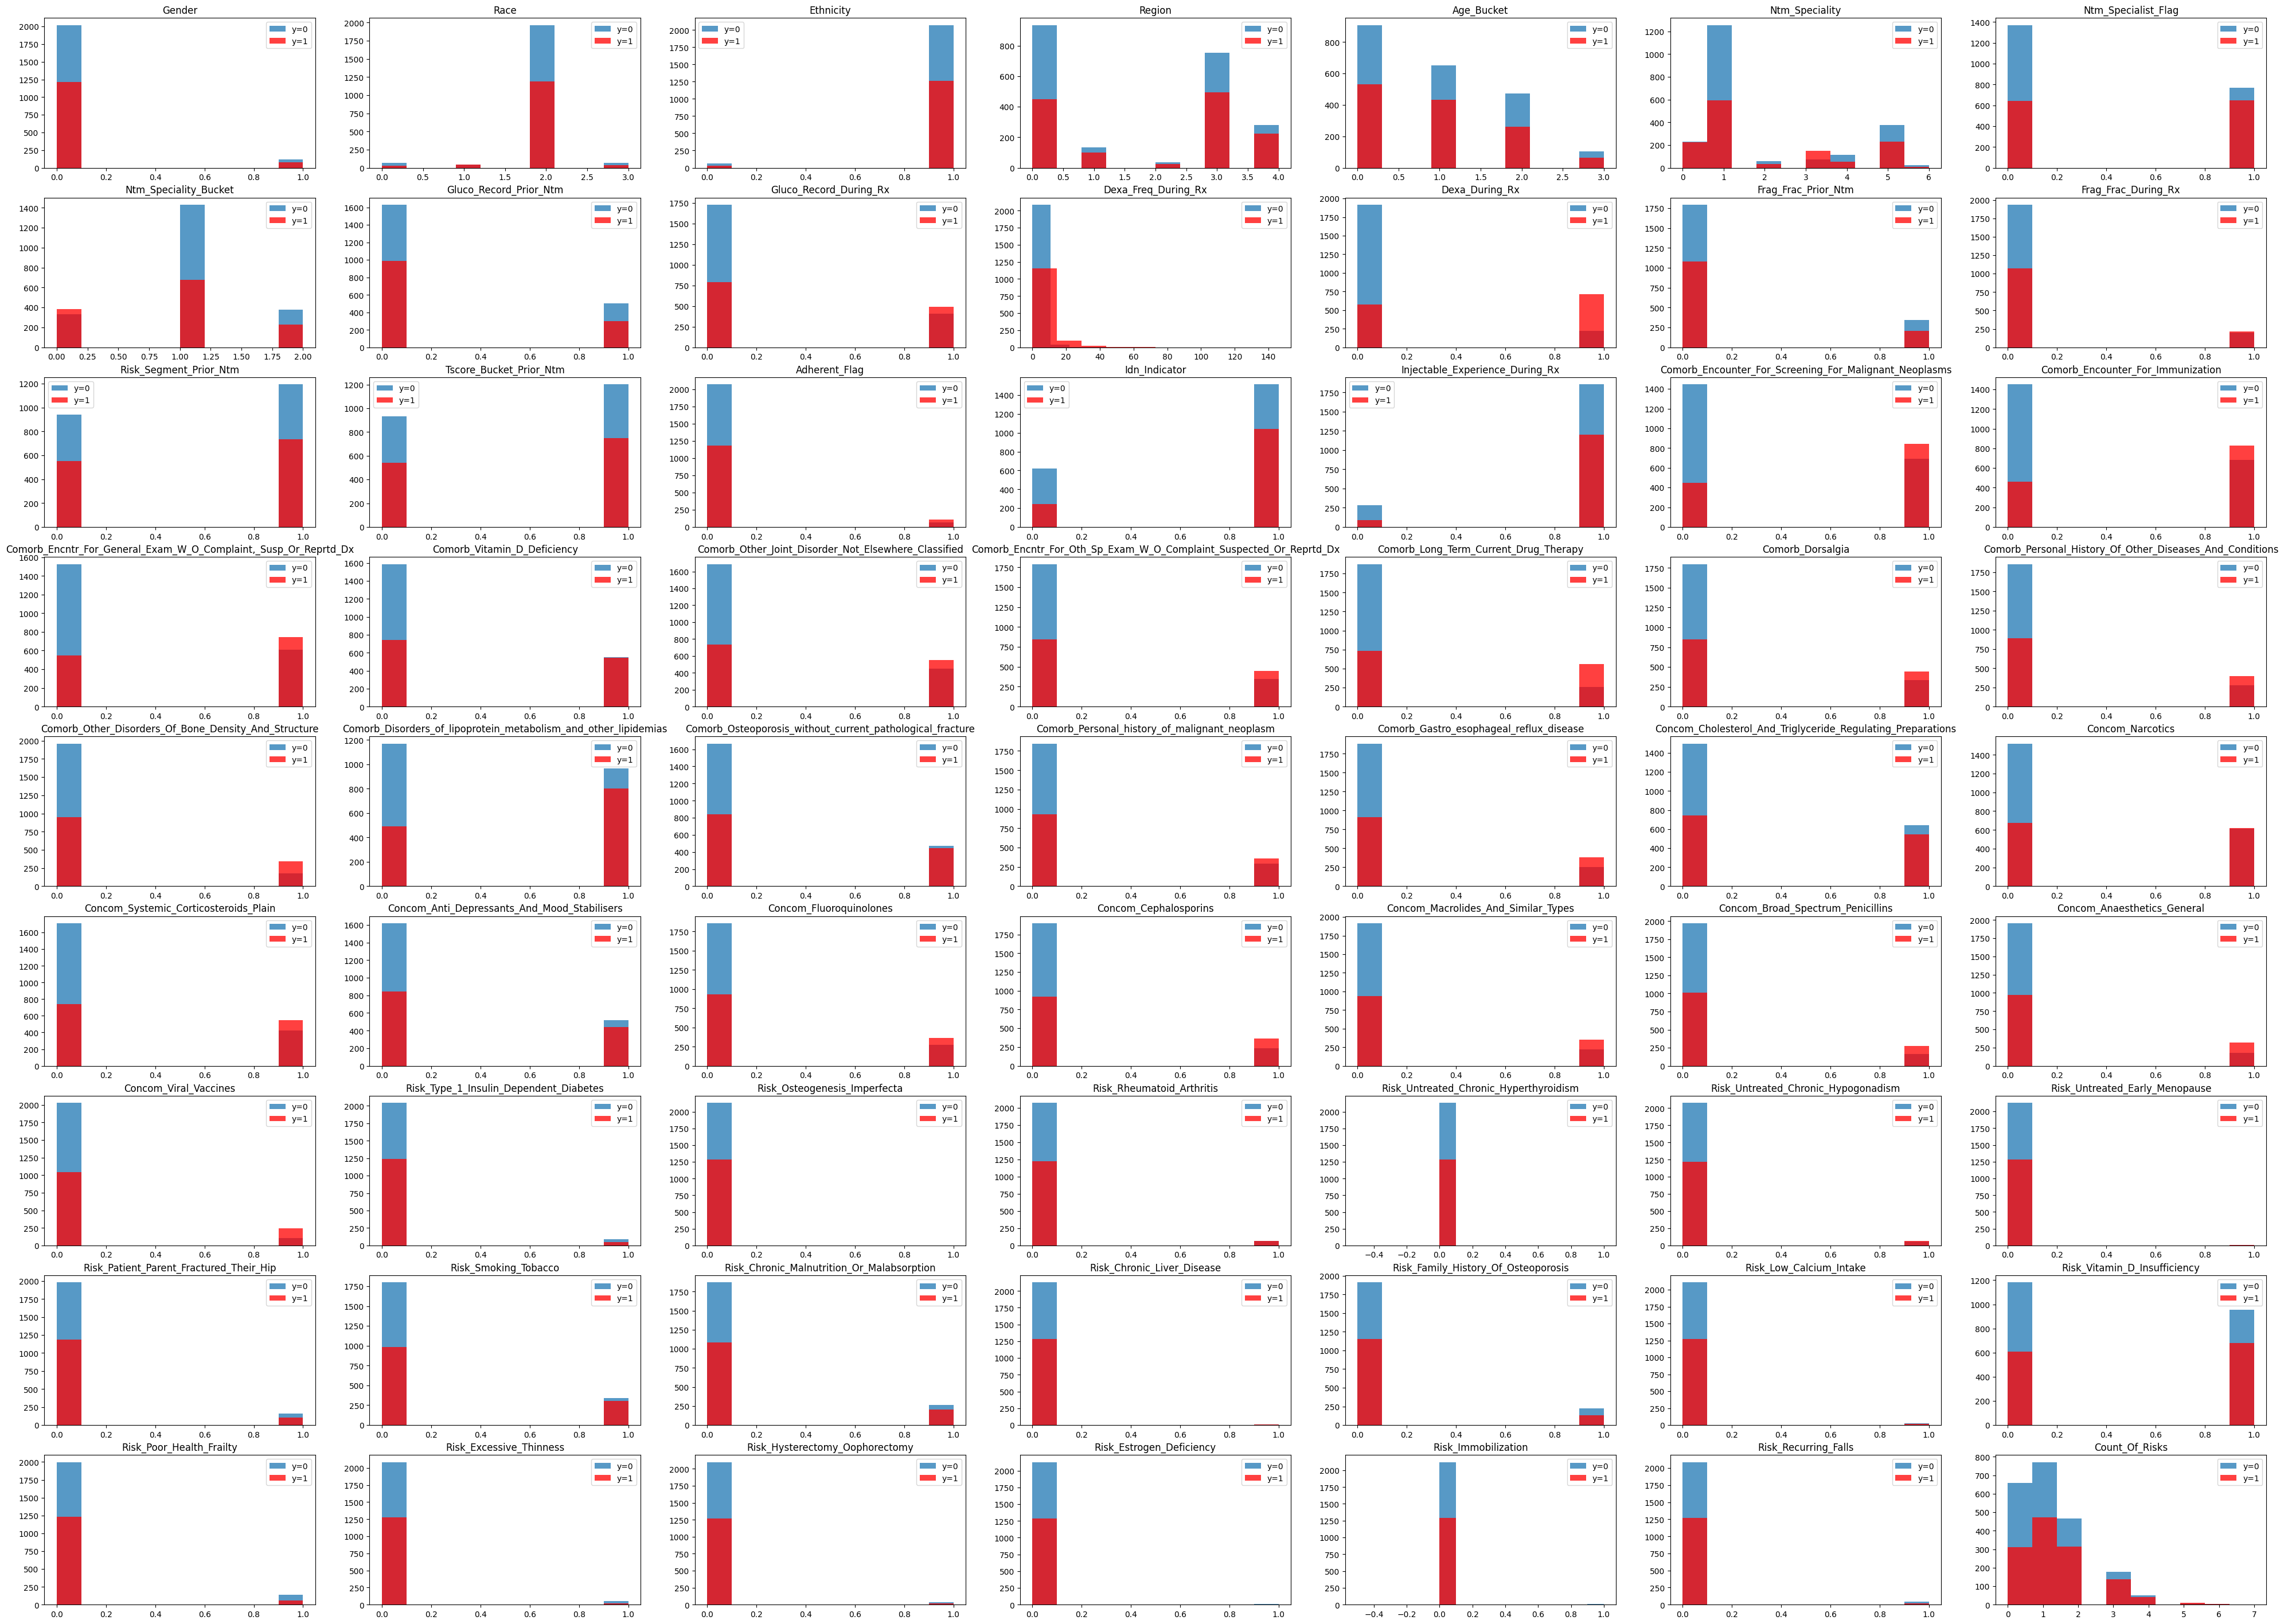

In [8]:
# histogram for each class

plt.figure(figsize=(50,40))

idx_0 =  df['Persistency_Flag'] == 0
idx_1 =  df['Persistency_Flag'] == 1

# your code here
for i,feature in enumerate(df.columns.drop(['Persistency_Flag'])):
    plt.subplot(10,7,i+1)   
    plt.hist(df.loc[idx_0,feature],density=0, alpha=0.75,label='y=0')
    plt.hist(df.loc[idx_1,feature],density=0, facecolor='red', alpha=0.75,label='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

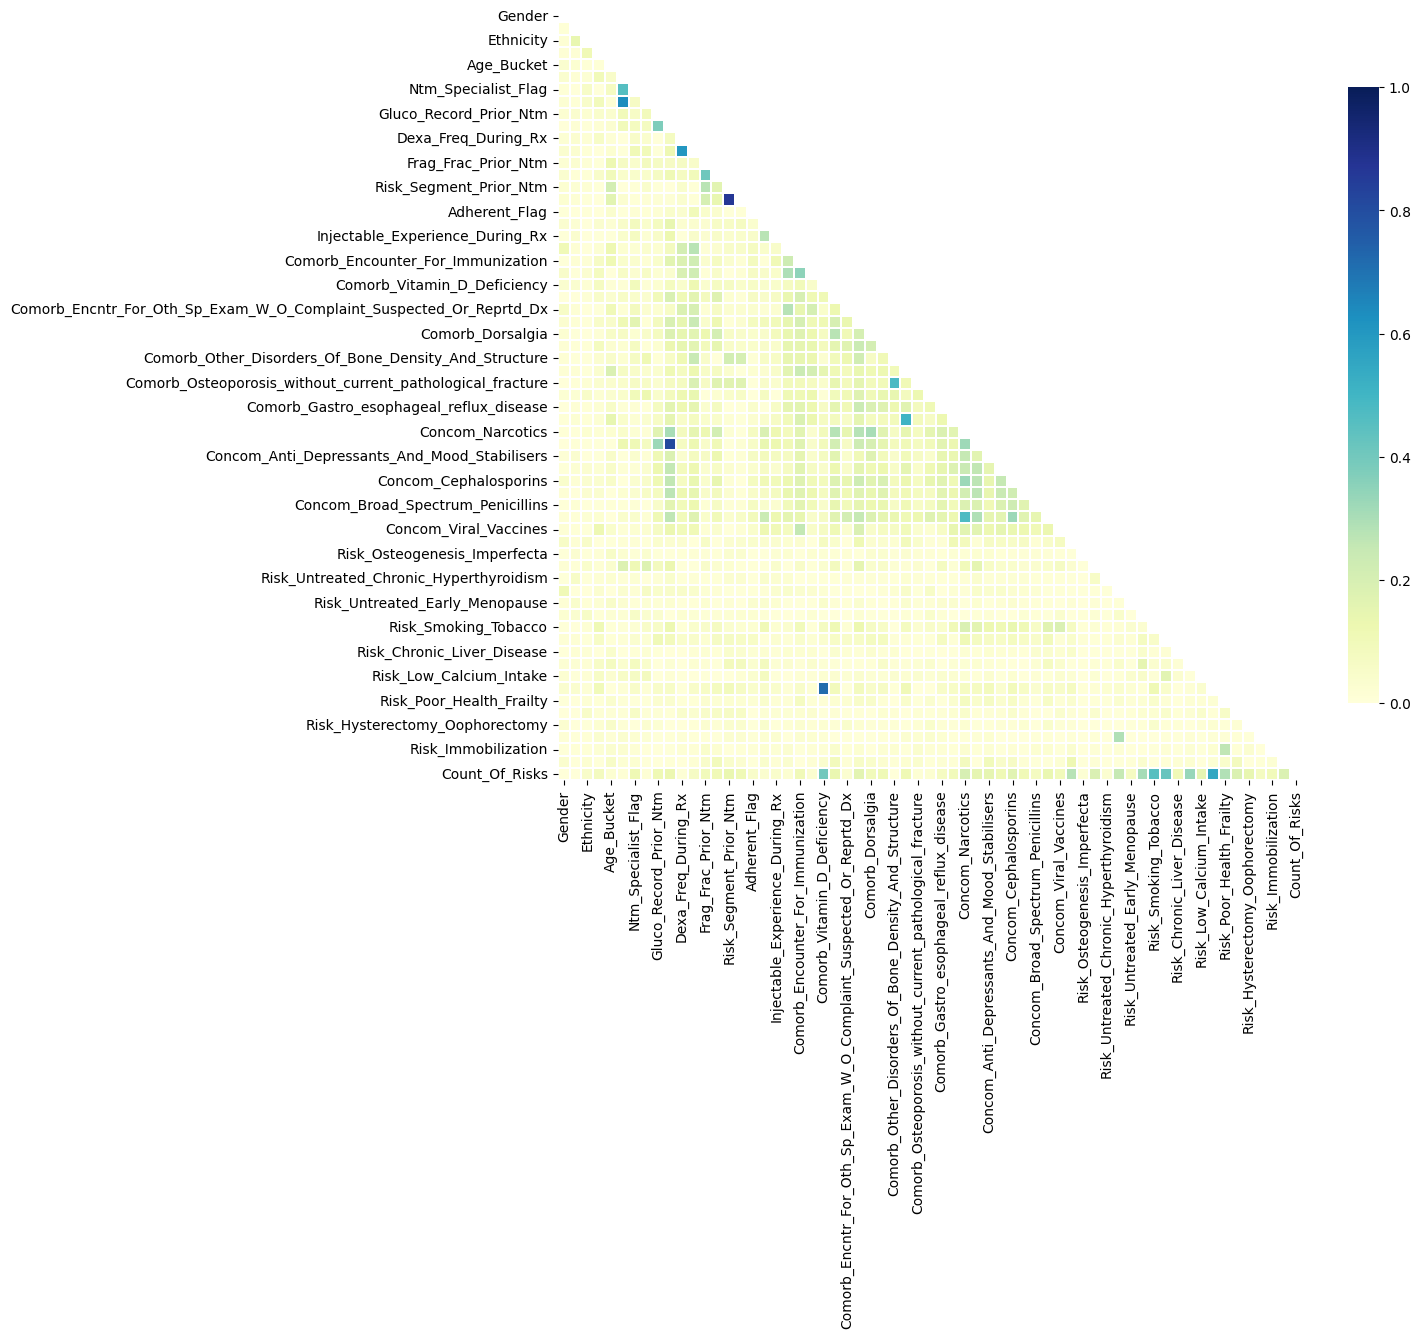

In [9]:
# Compute the correlation matrix
corr = np.abs(df.drop(['Persistency_Flag'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = df.columns.drop(['Persistency_Flag'])

X = df[features].values
y = df['Persistency_Flag'].values


## Step 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Data train: ', Xs_train.shape)
print('Data test:  ', Xs_test.shape)

print('Proportion train:%0.3f'%np.mean(y_train))
print('Proportion test: %0.3f'%np.mean(y_test))

Data train:  (2568, 63)
Data test:   (856, 63)
Proportion train:0.377
Proportion test: 0.376


## Decision Tree

best mean cross-validation score: 0.783
best parameters: {'max_depth': 1}


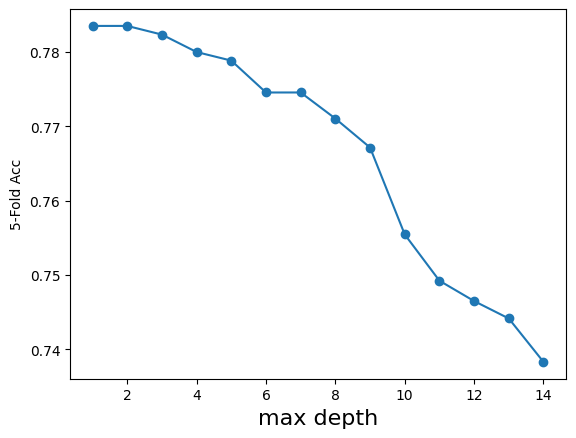

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [12]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.7834890965732088
Test:  0.7792056074766355


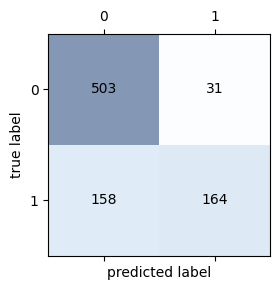

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       534
           1       0.84      0.51      0.63       322

    accuracy                           0.78       856
   macro avg       0.80      0.73      0.74       856
weighted avg       0.79      0.78      0.76       856



In [13]:
y_test_pred = treeModel.predict(X_test)

## Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
confmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_test_pred))

[Text(0.5, 0.75, 'Dexa_Freq_During_Rx <= 3.5\ngini = 0.47\nsamples = 2568\nvalue = [1601, 967]'),
 Text(0.25, 0.25, 'gini = 0.352\nsamples = 1921\nvalue = [1483, 438]'),
 Text(0.75, 0.25, 'gini = 0.298\nsamples = 647\nvalue = [118, 529]')]

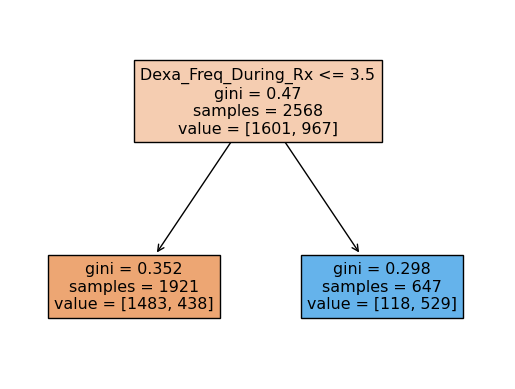

In [14]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

tree.plot_tree(treeModel,
               feature_names = features, 
               filled = True)

Dexa_Freq_During_Rx is clearly the variable that has the most value in terms of predictive power. It could be interesting to see if we can get similar results without it. 

Take into account the Dexa_Freq_During_Rx is kind of another type of treatment. So it would be better to be able to predict persistence without it.

### Another scenario without Dexa_Freq_During_Rx

In [15]:
features = df.columns.drop(['Persistency_Flag', 'Dexa_Freq_During_Rx'])

X = df[features].values
y = df['Persistency_Flag'].values


# Step 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Data train: ', Xs_train.shape)
print('Data test:  ', Xs_test.shape)

print('Proportion train:%0.3f'%np.mean(y_train))
print('Proportion test: %0.3f'%np.mean(y_test))

Data train:  (2568, 62)
Data test:   (856, 62)
Proportion train:0.377
Proportion test: 0.376


best mean cross-validation score: 0.771
best parameters: {'max_depth': 5}


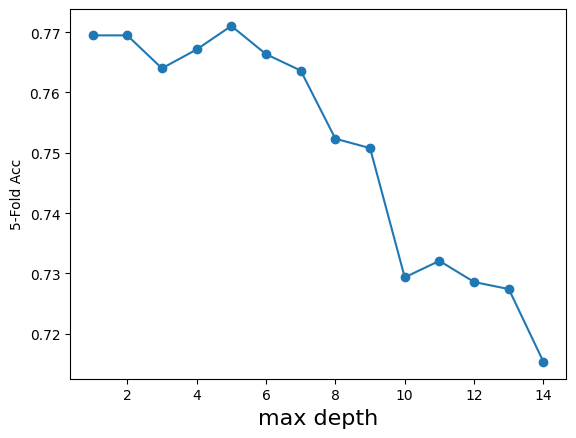

In [16]:
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [17]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.8177570093457944
Test:  0.7932242990654206


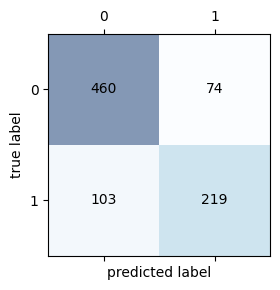

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       534
           1       0.75      0.68      0.71       322

    accuracy                           0.79       856
   macro avg       0.78      0.77      0.78       856
weighted avg       0.79      0.79      0.79       856



In [18]:
y_test_pred = treeModel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
confmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(confmat)
print(classification_report(y_test, y_test_pred))

[Text(0.5482456140350878, 0.9166666666666666, 'Dexa_During_Rx <= 0.5\ngini = 0.47\nsamples = 2568\nvalue = [1601, 967]'),
 Text(0.2807017543859649, 0.75, 'Comorb_Long_Term_Current_Drug_Therapy <= 0.5\ngini = 0.352\nsamples = 1857\nvalue = [1433, 424]'),
 Text(0.14035087719298245, 0.5833333333333334, 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx <= 0.5\ngini = 0.291\nsamples = 1536\nvalue = [1264, 272]'),
 Text(0.07017543859649122, 0.4166666666666667, 'Adherent_Flag <= 0.5\ngini = 0.194\nsamples = 1058\nvalue = [943, 115]'),
 Text(0.03508771929824561, 0.25, 'Concom_Viral_Vaccines <= 0.5\ngini = 0.181\nsamples = 1035\nvalue = [931, 104]'),
 Text(0.017543859649122806, 0.08333333333333333, 'gini = 0.164\nsamples = 990\nvalue = [901, 89]'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.444\nsamples = 45\nvalue = [30, 15]'),
 Text(0.10526315789473684, 0.25, 'Ntm_Specialist_Flag <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [12, 11]'),
 Text(0.08771929824561403, 0

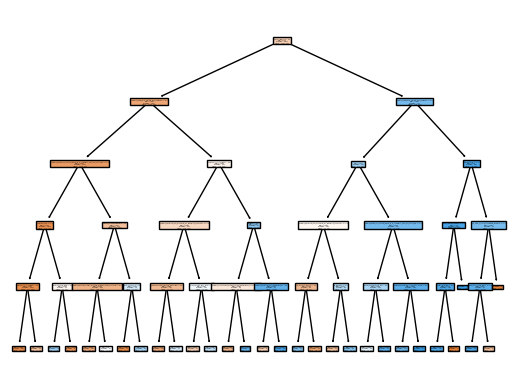

In [23]:
import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(treeModel, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True)


tree.plot_tree(treeModel,
               feature_names = features, 
               filled = True)

## we will save it

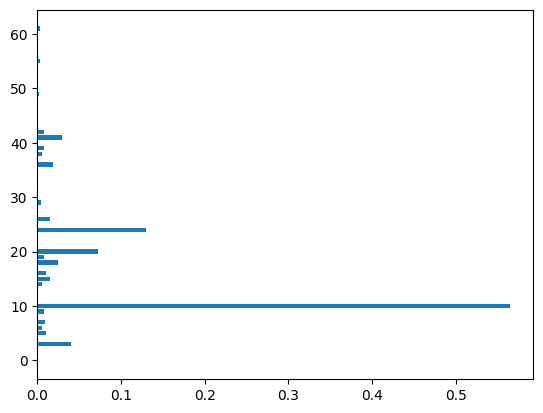

In [20]:
importance = treeModel.feature_importances_
# summarize feature importance
dicts = {}
for i,v in zip(features, importance):
	dicts[i] = (i,v)
#plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

In [21]:
importance_df = pd.DataFrame.from_dict(dicts, orient='index')

In [22]:
importance_df.sort_values(1, ascending=False).head(n=10)

,0,1
Dexa_During_Rx,Dexa_During_Rx,0.564448
Comorb_Long_Term_Current_Drug_Therapy,Comorb_Long_Term_Current_Drug_Therapy,0.129976
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx","Comorb_Encntr_For_General_Exam_W_O_Complaint,_...",0.072297
Region,Region,0.039838
Concom_Viral_Vaccines,Concom_Viral_Vaccines,0.028903
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Screening_For_Malignant_N...,0.024926
Concom_Fluoroquinolones,Concom_Fluoroquinolones,0.018267
Adherent_Flag,Adherent_Flag,0.015229
Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Personal_History_Of_Other_Diseases_And_...,0.015183
Ntm_Speciality,Ntm_Speciality,0.010864
